In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import time

In [2]:
def truncate_float(n, places):
    return int(n * (10 ** places)) / 10 ** places
e = [0.1,0.05,0.01,0.005,0.001]
h = 1
a = 1
b = 6
def f(x, y):
    function = 2*(2-x)*y+(x+2)*math.exp(-x**2)*math.exp(3*x)
    return function
def euler_method(a,b,h,e):
    heuler_method = h
    runge = 1
    start = time.perf_counter()
    while(runge > e):
        euler1 = np.empty(0)
        euler2 = np.empty(0)
        runge = np.empty(0)
        y = 10
        euler1 = np.append(euler1, 10)
        euler2 = np.append(euler2, 10)
        x = np.arange(a,(b+0.0000000000001),heuler_method)
        for i in x:
            y = y + heuler_method * f(i, y)
            euler1 = np.append(euler1, y)

        heuler_method /= 2
        y = 10
        x = np.arange(a,(b+0.0000000000001),heuler_method)
        for i in x:
            y = y + heuler_method * f(i, y)
            euler2 = np.append(euler2, y)
        euler1 = np.delete(euler1, euler1.size - 1)
        euler2 = np.delete(euler2, euler2.size - 1)
        for i in range(euler1.size-1):    
            runge = np.append(runge,(abs((euler2[2*i + 2] - euler1[i + 1]))))
        runge = np.max(runge)
    d = dict(zip(x,euler2))

    finish = time.perf_counter()
    function = round((finish - start),7)
    return runge,heuler_method,function
def hoyn_method(a,b,h,e):
    hhoyn_methoda = h
    runge = 1
    start = time.perf_counter()
    while(runge > e):
        runge = np.empty(0)
        hoyn_method1 = np.empty(0)
        hoyn_method2 = np.empty(0)
        y = 10
        hoyn_method1 = np.append(hoyn_method1, 10)
        hoyn_method2 = np.append(hoyn_method2, 10)
        x = np.arange(a,(b+0.0000000000001),hhoyn_methoda)
        for i in x:
            y = y + (hhoyn_methoda/2) * (f(i, y) + f((i+hhoyn_methoda),(y + hhoyn_methoda * f(i, y))))
            hoyn_method1 = np.append(hoyn_method1, y)
        hhoyn_methoda /= 2
        y = 10
        x = np.arange(a,(b+0.0000000000001),hhoyn_methoda)
        for i in x:
            y = y + (hhoyn_methoda/2) * (f(i, y) + f((i+hhoyn_methoda),(y + hhoyn_methoda * f(i, y))))
            hoyn_method2 = np.append(hoyn_method2, y)
        hoyn_method1 = np.delete(hoyn_method1, hoyn_method1.size - 1)
        hoyn_method2 = np.delete(hoyn_method2, hoyn_method2.size - 1)
        for i in range(hoyn_method1.size-1):    
            runge = np.append(runge,(abs((hoyn_method2[2*i + 2] - hoyn_method1[i + 1])))/3)
        runge = np.max(runge)
        d = dict(zip(x,hoyn_method2))

    finish = time.perf_counter()
    function = round((finish - start),7)
    return runge,hhoyn_methoda,function
def cauchy_method(a,b,h,e):
    hcauchy_method = h
    runge = 1
    start = time.perf_counter()
    while(runge > e):
        runge = np.empty(0)
        cauchy_method1 = np.empty(0)
        cauchy_method2 = np.empty(0)
        y = 10
        yk = [0]*5
        cauchy_method1 = np.append(cauchy_method1, 10)
        cauchy_method2 = np.append(cauchy_method2, 10)
        x = np.arange(a,(b+0.0000000000001),hcauchy_method)
        for i in x:
            yk[0] = y + hcauchy_method * f(i, y)
            for j in range(1,5,1):
              yk[j] = y + hcauchy_method/2 * (f(i,y) + f((i + hcauchy_method), (yk[j-1])))
            y = yk[4] 
            cauchy_method1 = np.append(cauchy_method1, y)
        hcauchy_method /= 2
        y = 10
        x = np.arange(a,(b+0.0000000000001),hcauchy_method)
        for i in x:
            yk[0] = y + hcauchy_method * f(i, y)
            for j in range(1,5,1):
              yk[j] = y + hcauchy_method/2 * (f(i,y) + f((i + hcauchy_method), (yk[j-1])))
            y = yk[4] 
            cauchy_method2 = np.append(cauchy_method2, y)
        cauchy_method1 = np.delete(cauchy_method1, cauchy_method1.size - 1)
        cauchy_method2 = np.delete(cauchy_method2, cauchy_method2.size - 1)
        for i in range(cauchy_method1.size-1):    
            runge = np.append(runge,(abs((cauchy_method2[2*i + 2] - cauchy_method1[i + 1])))/3)
        runge = np.max(runge)
    d = dict(zip(x,cauchy_method2))

    finish = time.perf_counter()
    function = round((finish - start),7)
    return runge,hcauchy_method,function

def refined_euler_method(a,b,h,e):
    hrefined_euler_method = h
    runge = 1
    start = time.perf_counter()
    while(runge > e):
        runge = np.empty(0)
        refined_euler_method1 = np.empty(0)
        refined_euler_method2 = np.empty(0)
        yeuler_method = [0]*3
        yeuler_method[0] = 10
        refined_euler_method1 = np.append(refined_euler_method1, 10)
        refined_euler_method2 = np.append(refined_euler_method2, 10)
        x = np.arange(a,(b+0.0000000000001),hrefined_euler_method)
        yeuler_method[1] = yeuler_method[0] + hrefined_euler_method * f((x[0] + hrefined_euler_method/2), (yeuler_method[0] + hrefined_euler_method/2 * f(x[0],yeuler_method[0])))
        for i in x:
            yeuler_method[2] = yeuler_method[0] + 2 * hrefined_euler_method * f((i+hrefined_euler_method),yeuler_method[1])
            yeuler_method[0] = yeuler_method[1]
            yeuler_method[1] = yeuler_method[2]
            refined_euler_method1 = np.append(refined_euler_method1, yeuler_method[2])
        hrefined_euler_method /= 2
        yeuler_method[0] = 10
        x = np.arange(a,(b+0.0000000000001),hrefined_euler_method)
        yeuler_method[1] = yeuler_method[0] + hrefined_euler_method * f((x[0] + hrefined_euler_method/2), (yeuler_method[0] + hrefined_euler_method/2 * f(x[0],yeuler_method[0])))
        for i in x:
            yeuler_method[2] = yeuler_method[0] + 2 * hrefined_euler_method * f((i+hrefined_euler_method),yeuler_method[1])
            yeuler_method[0] = yeuler_method[1]
            yeuler_method[1] = yeuler_method[2]
            refined_euler_method2 = np.append(refined_euler_method2, yeuler_method[2])
        refined_euler_method1 = np.delete(refined_euler_method1, refined_euler_method1.size - 1)
        refined_euler_method2 = np.delete(refined_euler_method2, refined_euler_method2.size - 1)
        for i in range(refined_euler_method1.size-1):    
            runge = np.append(runge,(abs((refined_euler_method2[2*i + 2] - refined_euler_method1[i + 1])))/3)
        runge = np.max(runge)
    d = dict(zip(x,refined_euler_method2))

    finish = time.perf_counter()
    function = round((finish- start),7)
    return runge,hrefined_euler_method, function

def midpoint_method(a,b,h,e):
    hmidpoint_method = h
    runge = 1
    start = time.perf_counter()
    while(runge > e):
        runge = np.empty(0)
        midpoint_method1 = np.empty(0)
        midpoint_method2 = np.empty(0)
        y = 10
        midpoint_method1 = np.append(midpoint_method1, 10)
        midpoint_method2 = np.append(midpoint_method2, 10)
        x = np.arange(a,(b+0.0000000000001),hmidpoint_method)
        for i in x:
            y = y + hmidpoint_method * f((i + hmidpoint_method/2),y + hmidpoint_method/2 * f(i,y))
            midpoint_method1 = np.append(midpoint_method1, y)
        hmidpoint_method /= 2
        y = 10
        x = np.arange(a,(b+0.0000000000001),hmidpoint_method)
        for i in x:
            y = y + hmidpoint_method * f((i + hmidpoint_method/2),y + hmidpoint_method/2 * f(i,y))
            midpoint_method2 = np.append(midpoint_method2, y)
        midpoint_method1 = np.delete(midpoint_method1, midpoint_method1.size - 1)
        midpoint_method2 = np.delete(midpoint_method2, midpoint_method2.size - 1)
        for i in range(midpoint_method1.size-1):    
            runge = np.append(runge,(abs((midpoint_method2[2*i + 2] - midpoint_method1[i + 1])))/3)
        runge = np.max(runge)
    d = dict(zip(x,midpoint_method2))

    finish = time.perf_counter()
    function = round((finish - start),7)
    return runge,hmidpoint_method,function

def runge_kutta_method(a,b,h,e):
    hrunge_kutta_method = h
    runge = 1
    start = time.perf_counter()
    while(runge > e):
        runge = np.empty(0)
        runge_kutta_method1 = np.empty(0)
        runge_kutta_method2 = np.empty(0)
        y = 10
        runge_kutta_method1 = np.append(runge_kutta_method1, 10)
        runge_kutta_method2 = np.append(runge_kutta_method2, 10)
        x = np.arange(a,(b+0.0000000000001),hrunge_kutta_method)
        for i in x:
            n1 = f(i,y)
            n2 = f((i + hrunge_kutta_method/2),( y + (hrunge_kutta_method/2) * n1))
            n3 = f((i + hrunge_kutta_method/2),( y + (hrunge_kutta_method/2) * n2))
            n4 = f((i + hrunge_kutta_method),( y + hrunge_kutta_method * n3))
            y = y + (hrunge_kutta_method/6) * (n1 + 2*n2 + 2*n3 + n4)
            runge_kutta_method1 = np.append(runge_kutta_method1, y)
        hrunge_kutta_method /= 2
        y = 10
        x = np.arange(a,(b+0.0000000000001),hrunge_kutta_method)
        for i in x:
            n1 = f(i,y)
            n2 = f((i + hrunge_kutta_method/2),( y + (hrunge_kutta_method/2) * n1))
            n3 = f((i + hrunge_kutta_method/2),( y + (hrunge_kutta_method/2) * n2))
            n4 = f((i + hrunge_kutta_method),( y + hrunge_kutta_method * n3))
            y = y + (hrunge_kutta_method/6) * (n1 + 2*n2 + 2*n3 + n4)
            runge_kutta_method2 = np.append(runge_kutta_method2, y)
        runge_kutta_method1 = np.delete(runge_kutta_method1, runge_kutta_method1.size - 1)
        runge_kutta_method2 = np.delete(runge_kutta_method2, runge_kutta_method2.size - 1)
        for i in range(runge_kutta_method1.size-1):    
            runge = np.append(runge,(abs((runge_kutta_method2[2*i + 2] - runge_kutta_method1[i + 1])))/15)
        runge = np.max(runge)
    d = dict(zip(x,runge_kutta_method2))

    finish = time.perf_counter()
    function = round((finish - start),7)
    return runge,hrunge_kutta_method, function      


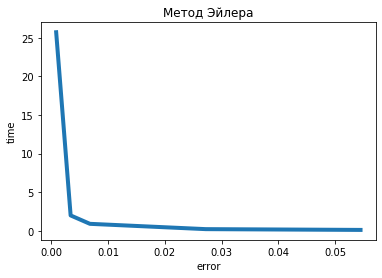

In [3]:
errors=[]
times=[]
for eps in e:
    errors.append(euler_method(a,b,h,eps)[0])
    times.append(euler_method(a,b,h,eps)[2])

plt.clf()
plt.title("Метод Эйлера")
plt.plot(errors,times, linewidth=4)
plt.xlabel('error')
plt.ylabel('time')
plt.show()

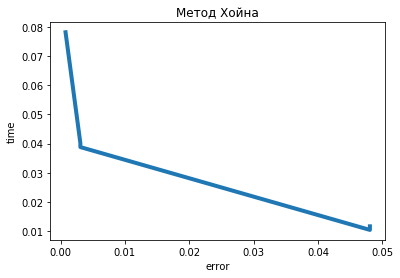

In [4]:
errors=[]
times=[]
for eps in e:
    errors.append(hoyn_method(a,b,h,eps)[0])
    times.append(hoyn_method(a,b,h,eps)[2])

plt.clf()
plt.title("Метод Хойна")
plt.plot(errors,times, linewidth=4)
plt.xlabel('error')
plt.ylabel('time')
plt.show()


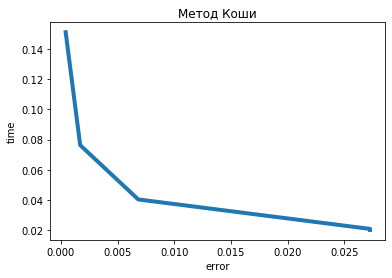

In [5]:
errors=[]
times=[]
for eps in e:
    errors.append(cauchy_method(a,b,h,eps)[0])
    times.append(cauchy_method(a,b,h,eps)[2])

plt.clf()
plt.title("Метод Коши")
plt.plot(errors,times, linewidth=4)
plt.xlabel('error')
plt.ylabel('time')
plt.show()


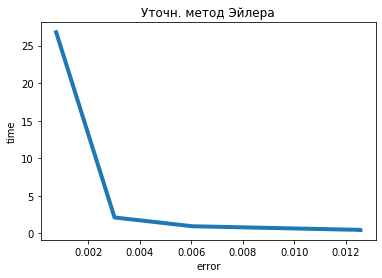

In [6]:

errors=[]
times=[]
for eps in e:
    errors.append(refined_euler_method(a,b,h,eps)[0])
    times.append(refined_euler_method(a,b,h,eps)[2])

plt.clf()
plt.title("Уточн. метод Эйлера")
plt.plot(errors,times, linewidth=4)
plt.xlabel('error')
plt.ylabel('time')
plt.show()

In [7]:

errors=[]
times=[]
for eps in e:
    errors.append(midpoint_method(a,b,h,eps)[0])
    times.append(midpoint_method(a,b,h,eps)[2])

plt.clf()
plt.title("Метод средней точки")
plt.plot(errors,times, linewidth=4)
plt.xlabel('error')
plt.ylabel('time')
plt.show()

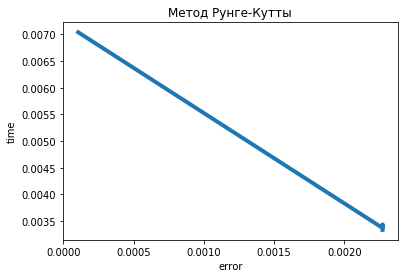

In [13]:
errors=[]
times=[]
for eps in e:
    errors.append(runge_kutta_method(a,b,h,eps)[0])
    times.append(runge_kutta_method(a,b,h,eps)[2])

plt.clf()
plt.title("Метод Рунге-Кутты")
plt.plot(errors,times, linewidth=4)
plt.xlabel('error')
plt.ylabel('time')
plt.show()